In [1]:
import os
import numpy as np
import cv2
import requests
from io import BytesIO

from omegaconf import OmegaConf

import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset, DataLoader
from tools import cfg2model 

In [2]:
class InferenceDataset(Dataset):
    def __init__(
            self,
            urls,
            preproc,
    ):
        """
        :param urls: urls to image 
        :param preproc: image preprocessing, input - RGB numpy array, output - torch Tensor
        """
        self.urls = urls
        self.preproc = preproc
        self.size = len(urls)

    def __len__(self):
        return self.size

    def __getitem__(self, idx):
        url = self.urls[idx]
        response = requests.get(url)
        
        if response.status_code != 200:
            raise Exception(f"Error fetching image from {url}. Status code: {response.status_code}")
        
        img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
        img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
        
        if img is None:
            raise Exception(f"Error decoding image from {url}")
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        input_img = self.preproc(img)
        return url, img, input_img



In [3]:
def load_from_exp(exp_path):
    cfg = OmegaConf.load(os.path.join(exp_path, ".hydra", "config.yaml"))["model_cfg"]

    cfg["load_pretrained"] = True
    cfg["pretrained_path"] = os.path.join(exp_path, "model.pt")

    model, preproc, tokenizer = cfg2model(cfg)
    
    return model, preproc, tokenizer


<h1> Load model from experiment </h1>

In [4]:
device = "cuda"

In [5]:
exp_path = "outputs/2024-02-16/02-05-25"
exp_name = "/".join(exp_path.split("/")[1:])

model, preproc, _ = load_from_exp(exp_path)
model = model.to(device)

Using cache found in /home/raph/.cache/torch/hub/facebookresearch_dinov2_main


<h1> Create dataset </h1>

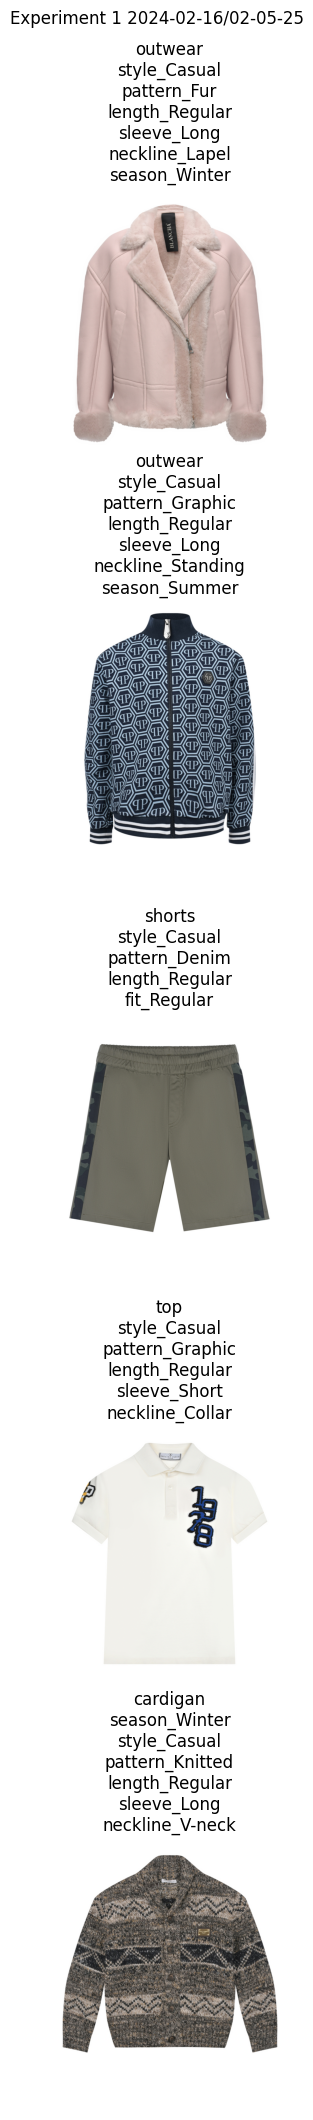

In [8]:
import matplotlib.pyplot as plt
import torch

# https://www.keng.ru/catalog/malchiki-odezhda-futbolki-mayki-polo/philipp-plein-belaya-futbolka-polo-s-logo-na-spine/

urls = [
    "https://www.keng.ru/upload/iblock/867/ebgh7m8r83bxwu11eejadkhvmd179evm.JPG",
    "https://www.keng.ru/upload/iblock/079/lsbuahkx2afqaj836fdr77rzj1z6vzly.JPG",
    "https://www.keng.ru/upload/iblock/47f/swnt0u43f4l79tbngksm694xsikb822y.jpg",
    "https://www.keng.ru/upload/iblock/6ec/s5x8vhzhjvhgoc0rrpcndtosw6ybokxu.JPG",
    "https://www.keng.ru/upload/iblock/ac3/uru4tzy6flayp4qm0qtd4l0612hm1gbm.JPG",
]

num_images = len(urls)

dataset = InferenceDataset(urls, preproc)

model.eval()
with torch.no_grad():
    # Create a figure outside the loop to accommodate all subplots
    fig = plt.figure(figsize=(10, num_images * 5))  # Adjust figsize for better display of images and text
    
    for idx, (url, orig_img, prep_img) in enumerate(dataset):
        pred = model.inference(prep_img.unsqueeze(0).to(device))
        formatted_pred = '\n'.join(pred)
        
        # Add a subplot for each image
        ax = fig.add_subplot(num_images, 1, idx + 1)
        ax.imshow(orig_img)
        ax.axis('off')  # This hides the coordinate axes
        ax.set_title(formatted_pred, loc='center', pad=0)  # Adjust pad for spacing between title and image
    
    # Adjust the vertical spacing between the subplots
    plt.subplots_adjust(hspace=0.5) 

    # plt.suptitle(f"Experiment 1 {exp_name}")
    plt.suptitle(f"Experiment 1 {exp_name}", y=0.95)  # y is typically between 0 and 1

    plt.show()


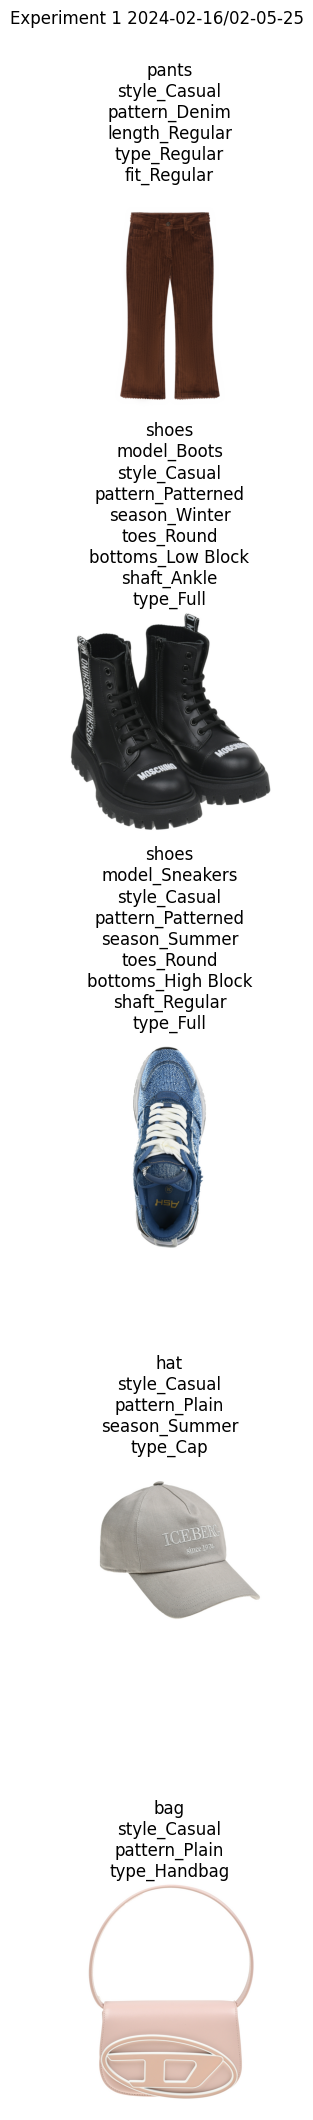

In [10]:
import matplotlib.pyplot as plt
import torch

# https://www.keng.ru/catalog/malchiki-odezhda-futbolki-mayki-polo/philipp-plein-belaya-futbolka-polo-s-logo-na-spine/

urls = [
    "https://www.keng.ru/upload/iblock/c74/2qctfg3euitr6249kvll6x37umk6lvp1.jpg",
    "https://www.keng.ru/upload/iblock/1d9/e54k1iwzh41n628y0hffy9lv11gklp8o.jpg",
    "https://www.keng.ru/upload/iblock/d44/lem7e07pvyx3esw3xx4zwwmo5x5ytwp0.JPG",
    "https://www.keng.ru/upload/iblock/1b4/5yazf6eadmwvqjfopw17jsz65vqnvm7n.JPG",
    "https://www.keng.ru/upload/iblock/527/z93gftqs1r7rk0l8vfp4d53e7lhurdja.JPG"
]

num_images = len(urls)

dataset = InferenceDataset(urls, preproc)

model.eval()
with torch.no_grad():
    # Create a figure outside the loop to accommodate all subplots
    fig = plt.figure(figsize=(10, num_images * 5))  # Adjust figsize for better display of images and text
    
    for idx, (url, orig_img, prep_img) in enumerate(dataset):
        pred = model.inference(prep_img.unsqueeze(0).to(device))
        formatted_pred = '\n'.join(pred)
        
        # Add a subplot for each image
        ax = fig.add_subplot(num_images, 1, idx + 1)
        ax.imshow(orig_img)
        ax.axis('off')  # This hides the coordinate axes
        ax.set_title(formatted_pred, loc='center', pad=0)  # Adjust pad for spacing between title and image
    
    # Adjust the vertical spacing between the subplots
    plt.subplots_adjust(hspace=0.85) 

    # plt.suptitle(f"Experiment 1 {exp_name}")
    plt.suptitle(f"Experiment 1 {exp_name}", y=0.95)  # y is typically between 0 and 1

    plt.show()
